# Tutorial Plot Data - 04

> Dalam tutorial 03, dijelaskan contoh respon multi sensor dari 1 sampel. Tutorial 04 mencoba untuk melakukan prosedur ekstraksi fitur terhadap beberapa sampel multi-sensor. Metode ekstraksi yang digunakan adalah kenaikan maksimum masing-masing sensor.

In [5]:
import os
import re
from fnmatch import fnmatch

import pandas as pd
from snhlib.dataviz import CalcPCA

## Fungsi untuk scan file dalam folder

- os.walk digunakan untuk mencari nama folder, sub-folder, dan file di masing-masing folder dan sub-folder.
- fnmatch digunakan untuk memilih file sesuai dengan ekstensi yang diberikan, dalam contoh ini adalah CSV.
- os.path.join digunakan untuk menggabungkan nama folder/sub-folder dan nama file.
- list.append digunakan untuk meng-insert new value ke dalam list.

Ref:
- [os.walk() in Python - GeeksforGeeks](https://www.geeksforgeeks.org/os-walk-python/)
- [fnmatch — Unix filename pattern matching — Python 3.11.0 documentation](https://docs.python.org/3/library/fnmatch.html)
- [Python  os.path.join() method - GeeksforGeeks](https://www.geeksforgeeks.org/python-os-path-join-method/)
- [Python List append() Method](https://www.w3schools.com/python/ref_list_append.asp)

In [6]:
def scanroot(root, pattern="*.csv"):
    res = []
    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern):
                r = os.path.join(path, name)
                res.append(r)
    return res

In [7]:
# folder path
dir_path = "../data/rawdata/"

# list to store files name
list_files = scanroot(dir_path)
list_files

['../data/rawdata/positive/File 8.csv',
 '../data/rawdata/positive/File 9.csv',
 '../data/rawdata/positive/File 10.csv',
 '../data/rawdata/positive/File 1.csv',
 '../data/rawdata/positive/File 2.csv',
 '../data/rawdata/positive/File 3.csv',
 '../data/rawdata/positive/File 7.csv',
 '../data/rawdata/positive/File 6.csv',
 '../data/rawdata/positive/File 4.csv',
 '../data/rawdata/positive/File 5.csv',
 '../data/rawdata/negative/File 8.csv',
 '../data/rawdata/negative/File 9.csv',
 '../data/rawdata/negative/File 10.csv',
 '../data/rawdata/negative/File 1.csv',
 '../data/rawdata/negative/File 2.csv',
 '../data/rawdata/negative/File 3.csv',
 '../data/rawdata/negative/File 7.csv',
 '../data/rawdata/negative/File 6.csv',
 '../data/rawdata/negative/File 4.csv',
 '../data/rawdata/negative/File 5.csv']

In [8]:
item = list_files[0]
item

'../data/rawdata/positive/File 8.csv'

### Pelabelan

Melakukan pelabelan sesuai dengan nama folder. `re.search` dapat mencari karakter dalam suatu `string`. Penggunaan `bool` dilakukan sehingga output bernilai `True` jika kata `nega` ada di `path`. Jika tidak, maka `False`.

#### Pelabelan tipe penulisan panjang

In [9]:
label = str
if bool(re.search("nega", item.lower())):
    label = "Negative"
else:
    label = "Positive"

label

'Positive'

#### 1 line code

In [10]:
label = "Negative" if bool(re.search("nega", item.lower())) else "Positive"
label

'Positive'

#### Fungsi get label untuk efisiensi penulisan program 

In [11]:
def get_label(item:str) -> str:
    return "Negative" if bool(re.search("nega", item.lower())) else "Positive"

## Open data contoh

In [12]:
df = pd.read_csv(item)
df.head()

,time(s),S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,Temp,Humid
0,0.0,1921.125,2182.875,2102.250,2231.000,2440.875,1916.625,447.000,2577.375,1786.500,1644.125,38.43,44.89
1,0.1,1920.375,2181.500,2102.250,2230.375,2440.875,1916.625,447.000,2576.500,1786.000,1643.375,38.45,44.92
2,0.2,1919.750,2180.000,2102.125,2229.625,2440.750,1916.375,447.125,2575.750,1785.500,1642.625,38.45,44.89
3,0.3,1919.125,2178.500,2102.125,2229.000,2440.750,1916.375,447.125,2574.875,1785.125,1642.000,38.45,44.90
4,0.4,1918.500,2177.000,2102.125,2228.375,2440.625,1916.375,447.125,2574.000,1784.750,1641.375,38.45,44.95


## Funsi ekstraksi:

$$ x = max(y) - y(0) $$

In [13]:
def fungsi_extract(y):
    y0 = y[0]
    ym = max(y)
    return ym - y0

### Seleksi sensor yang akan dilakukan ekstraksi (S1 - S10)

In [14]:
COLS = [f"S{i+1}" for i in range(10)]
COLS

['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10']

In [15]:
df[COLS]

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,1921.125,2182.875,2102.250,2231.000,2440.875,1916.625,447.000,2577.375,1786.500,1644.125
1,1920.375,2181.500,2102.250,2230.375,2440.875,1916.625,447.000,2576.500,1786.000,1643.375
2,1919.750,2180.000,2102.125,2229.625,2440.750,1916.375,447.125,2575.750,1785.500,1642.625
3,1919.125,2178.500,2102.125,2229.000,2440.750,1916.375,447.125,2574.875,1785.125,1642.000
4,1918.500,2177.000,2102.125,2228.375,2440.625,1916.375,447.125,2574.000,1784.750,1641.375
...,...,...,...,...,...,...,...,...,...,...
446,2416.875,3041.125,2208.250,2716.750,2620.500,2165.500,785.125,3156.250,2492.125,2262.125
447,2415.625,3039.375,2207.875,2714.375,2618.625,2161.375,784.125,3153.875,2486.625,2258.500
448,2414.250,3037.375,2207.250,2711.875,2616.625,2157.125,783.125,3151.375,2481.000,2254.625
449,2412.875,3035.375,2206.875,2709.375,2614.625,2153.000,782.125,3148.875,2475.125,2250.750


### Prosedur ekstraksi
- gunakan fungsi `apply` untuk menerapkan `fungsi_extract` terhadap masing-masing kolom sensor terpilih S1 - S10.
- ubah hasil menjadi `pandas.DataFrame` (tujuan akhir adalah membuat tabel hasil ekstraksi masing-masing file csv.
- `transpose` `pandas.DataFrame` agar sesuai.
- tambah `pandas.DataFrame.index` sesuai dengan urutan file
- tambah `label` melalui function `get_label` sebelumnya

Ref:
-  [pandas.DataFrame.apply — pandas 1.5.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [16]:
x = df[COLS].apply(fungsi_extract)
x

S1     507.000
S2     873.500
S3     108.750
S4     525.375
S5     200.375
S6     327.125
S7     345.000
S8     602.750
S9     802.250
S10    656.250
dtype: float64

In [17]:
type(x)

pandas.core.series.Series

In [18]:
x = pd.DataFrame(x).transpose()
x

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,507.0,873.5,108.75,525.375,200.375,327.125,345.0,602.75,802.25,656.25


In [19]:
x.index = [1]
x

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
1,507.0,873.5,108.75,525.375,200.375,327.125,345.0,602.75,802.25,656.25


In [20]:
x.loc[1, 'Label'] = get_label(item)
x

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,Label
1,507.0,873.5,108.75,525.375,200.375,327.125,345.0,602.75,802.25,656.25,Positive


### Apply kepada seluruh list_file

- enumerate menghasilkan output item dan index dalam list.
- pandas.concat digunakan untuk menggabungkan beberapa pandas.DataFrame

[pandas.concat — pandas 1.5.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [21]:
data = pd.DataFrame()
for i, item in enumerate(list_files):
    df = pd.read_csv(item)
    x = pd.DataFrame(df[COLS].apply(fungsi_extract)).transpose()
    x.index = [i]
    x.loc[i, 'Label'] = get_label(item)
    
    data = pd.concat([data, x])
    
data

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,Label
0,507.000,873.500,108.750,525.375,200.375,327.125,345.000,602.750,802.250,656.250,Positive
1,822.375,1457.125,108.625,911.125,189.500,203.500,908.750,1393.375,1067.625,821.250,Positive
2,434.000,1479.875,62.250,472.375,124.000,137.125,41.125,1136.625,1061.500,451.250,Positive
3,512.750,1054.000,24.625,529.625,156.875,279.125,278.250,612.250,725.375,721.125,Positive
4,320.875,947.375,57.125,338.000,152.875,227.500,77.000,459.875,699.375,442.125,Positive
5,995.000,1357.375,230.250,1005.000,302.625,474.000,985.625,1034.875,915.875,1131.875,Positive
6,444.000,1482.375,43.750,507.125,211.750,222.125,58.375,1022.125,1119.750,451.500,Positive
7,547.250,1053.125,70.500,571.750,208.250,316.625,277.000,697.250,804.125,672.750,Positive
8,691.250,1877.250,59.625,742.125,218.000,235.125,322.125,1253.000,1501.750,698.875,Positive
9,1243.625,1100.625,312.250,1165.000,465.750,763.000,1804.500,1153.000,965.125,1680.875,Positive


#### Simpan hasil ekstraksi dalam file CSV menggunakan fungsi `to_csv`

In [19]:
data.to_csv("../data/processing/data-extract.csv", index=False)

## Analisis Multivariat menggunakan PCA (principal component analysis) 

In [22]:
X = data[COLS].values
y = data['Label'].values

In [23]:
pca = CalcPCA(featurename=COLS)
pca.fit(X, y)

PCA()

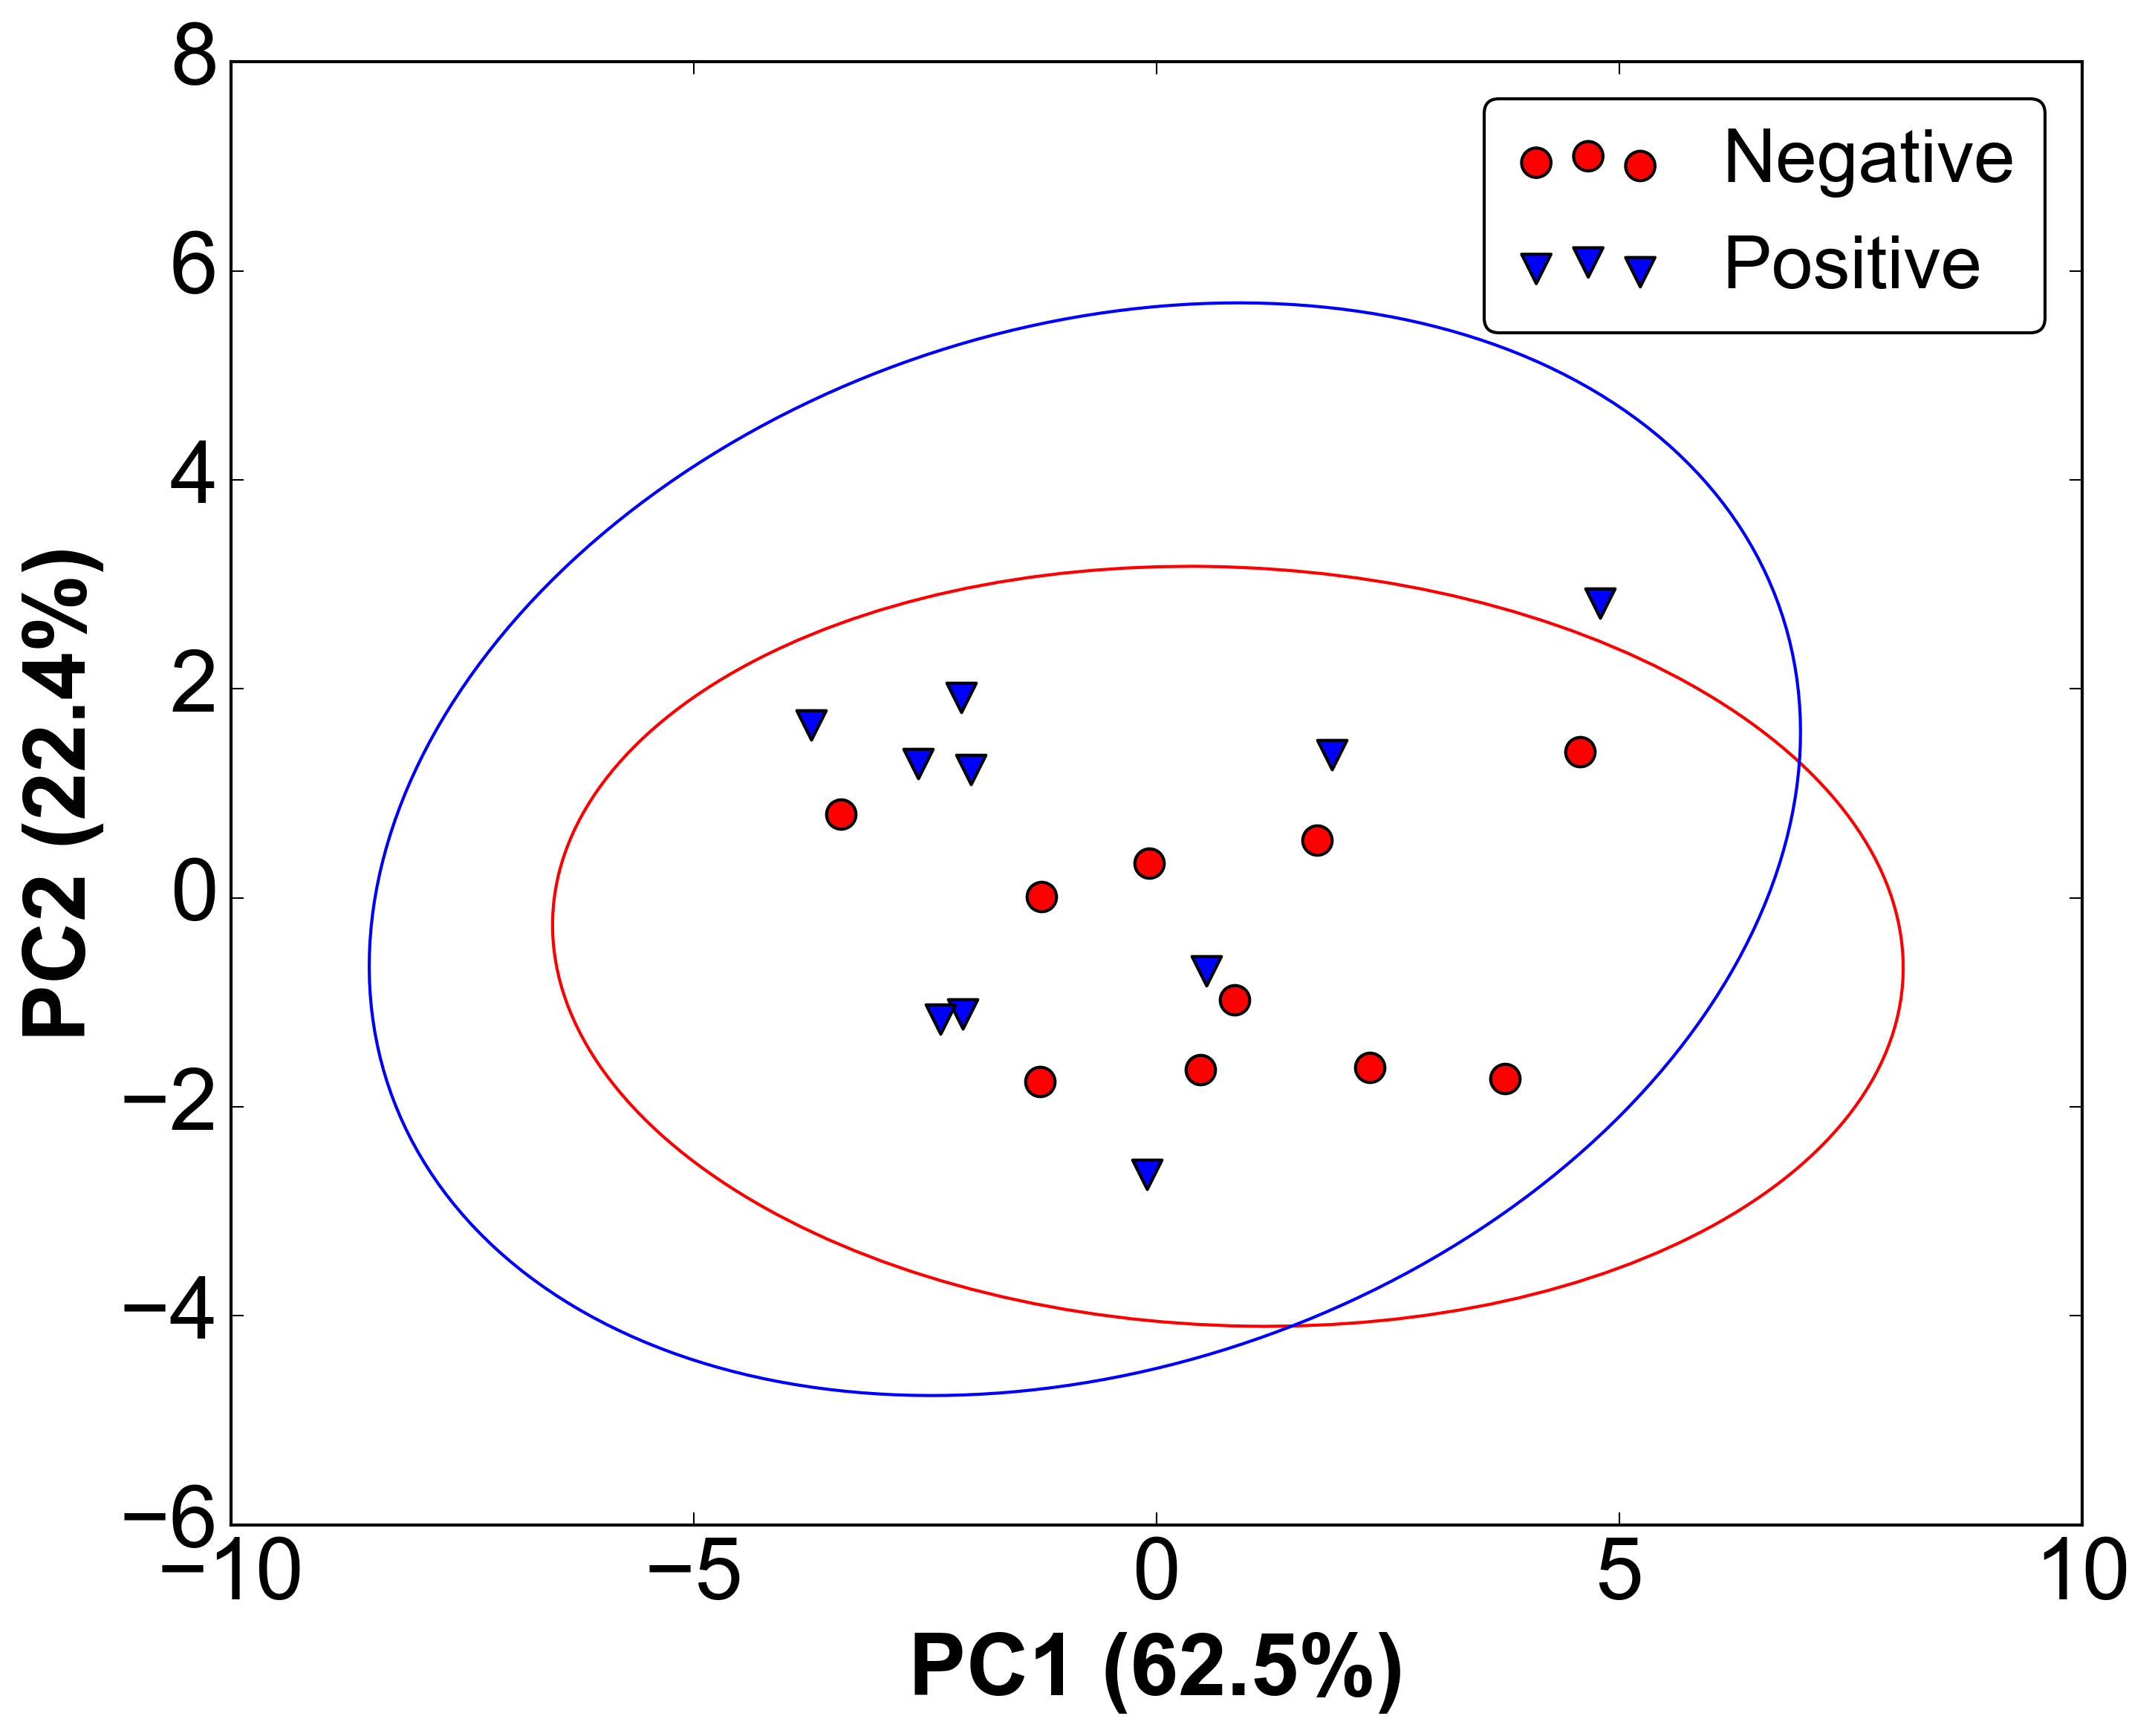

In [24]:
fig = pca.plotpc()

In [25]:
fig.savefig('../reports/figures/04_pca-data.svg')